<a href="https://colab.research.google.com/github/LeevesC/DeepLearningAmt/blob/main/DeepLearning_asm2_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.layers import BatchNormalization
import seaborn as sns

In [ ]:
df = pd.read_csv("./sample_data/cat_img/cat_dog.csv")
df.head()

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['labels'])
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

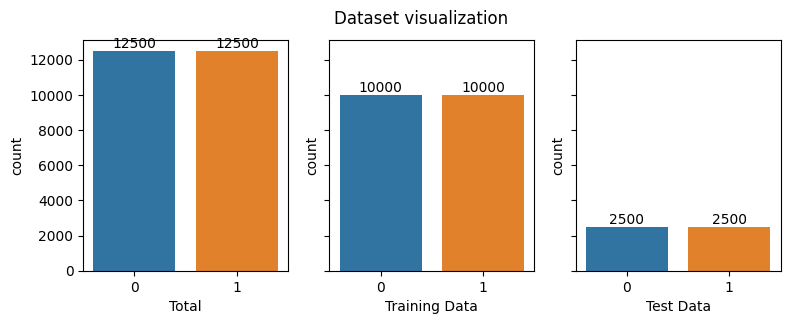

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))
barplot1 = sns.countplot(x='labels',data=df, ax=ax[0])
barplot2 = sns.countplot(x='labels',data=train_df, ax=ax[1])
barplot3 = sns.countplot(x='labels',data=test_df, ax=ax[2])


ax[0].bar_label(barplot1.containers[0])
ax[1].bar_label(barplot2.containers[0])
ax[2].bar_label(barplot3.containers[0])

ax[0].set_xlabel('Total')
ax[1].set_xlabel('Training Data')
ax[2].set_xlabel('Test Data')
fig.suptitle('Dataset visualization')
plt.show()

In [ ]:
temp = []
for img_name in train_df.image:
    img_path = os.path.join("./sample_data/cat_img/cat_dog/", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

<ipython-input-7-45b61ae846bf>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
# test image
temp = []
for img_name in test_df.image:
    img_path = os.path.join("./sample_data/cat_img/cat_dog/", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

<ipython-input-8-be5783a7e5e4>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train_df.labels)
train_y = to_categorical(train_y)
test_y = lb.fit_transform(test_df.labels)
test_y = to_categorical(test_y)

## AlexNet model

In [ ]:
# Adjusted model to adhere more closely to original AlexNet architecture, with no padding and adjusted kernel sizes and strides
model = Sequential()
model.add(Conv2D(96, (3,3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(384, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10
125/125 [==============================] - 16s 21ms/step - loss: 0.6841 - accuracy: 0.5717 - val_loss: 0.7206 - val_accuracy: 0.4930
Epoch 2/10
125/125 [==============================] - 2s 16ms/step - loss: 0.6022 - accuracy: 0.6781 - val_loss: 0.7159 - val_accuracy: 0.4930
Epoch 3/10
125/125 [==============================] - 2s 16ms/step - loss: 0.5217 - accuracy: 0.7420 - val_loss: 0.8273 - val_accuracy: 0.5070
Epoch 4/10
125/125 [==============================] - 2s 16ms/step - loss: 0.4587 - accuracy: 0.7881 - val_loss: 0.8670 - val_accuracy: 0.5070
Epoch 5/10
125/125 [==============================] - 2s 16ms/step - loss: 0.4014 - accuracy: 0.8203 - val_loss: 0.6860 - val_accuracy: 0.5505
Epoch 6/10
125/125 [==============================] - 2s 16ms/step - loss: 0.3578 - accuracy: 0.8408 - val_loss: 0.6784 - val_accuracy: 0.5790
Epoch 7/10
125/125 [==============================] - 2s 16ms/step - loss: 0.3149 - accuracy: 0.8624 - val_loss: 1.8861 - val_accuracy: 0.507

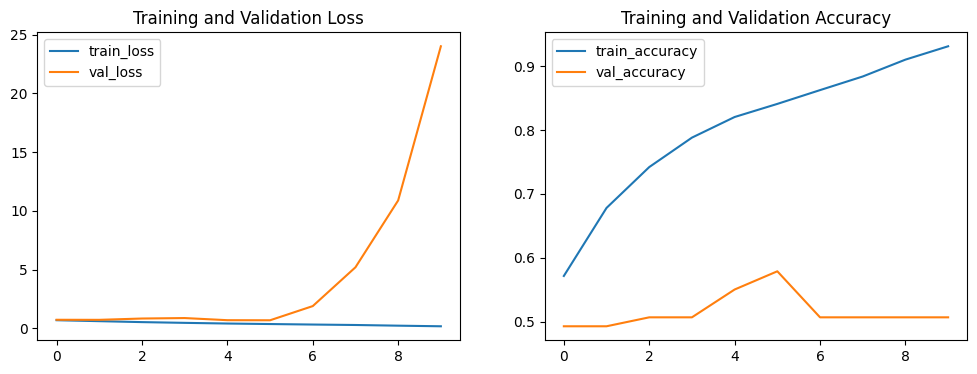

157/157 [==============================] - 1s 3ms/step


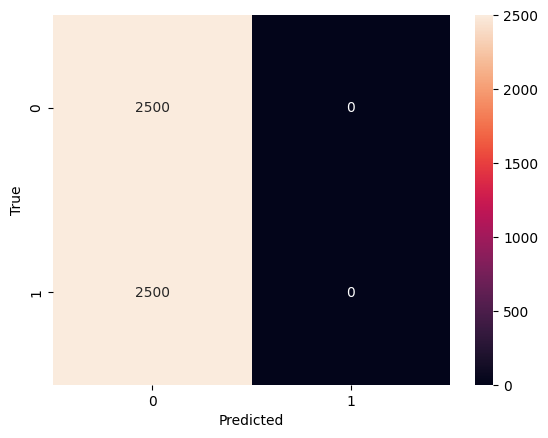

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/20
125/125 [==============================] - 2s 17ms/step - loss: 0.1429 - accuracy: 0.9438 - val_loss: 0.8105 - val_accuracy: 0.5085
Epoch 2/20
125/125 [==============================] - 2s 16ms/step - loss: 0.1181 - accuracy: 0.9538 - val_loss: 0.8323 - val_accuracy: 0.5982
Epoch 3/20
125/125 [==============================] - 2s 16ms/step - loss: 0.1037 - accuracy: 0.9606 - val_loss: 1.2851 - val_accuracy: 0.5530
Epoch 4/20
125/125 [==============================] - 2s 16ms/step - loss: 0.0809 - accuracy: 0.9683 - val_loss: 3.9630 - val_accuracy: 0.5095
Epoch 5/20
125/125 [==============================] - 2s 16ms/step - loss: 0.0720 - accuracy: 0.9726 - val_loss: 1.0260 - val_accuracy: 0.6685
Epoch 6/20
125/125 [==============================] - 2s 16ms/step - loss: 0.0499 - accuracy: 0.9821 - val_loss: 8.8533 - val_accuracy: 0.5070
Epoch 7/20
125/125 [==============================] - 2s 16ms/step - loss: 0.0566 - accuracy: 0.9812 - val_loss: 0.9897 - val_accuracy: 0.5775

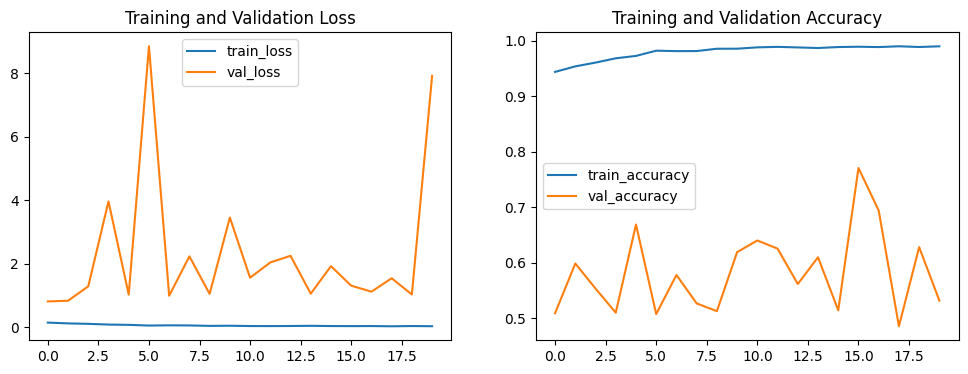

157/157 [==============================] - 0s 2ms/step


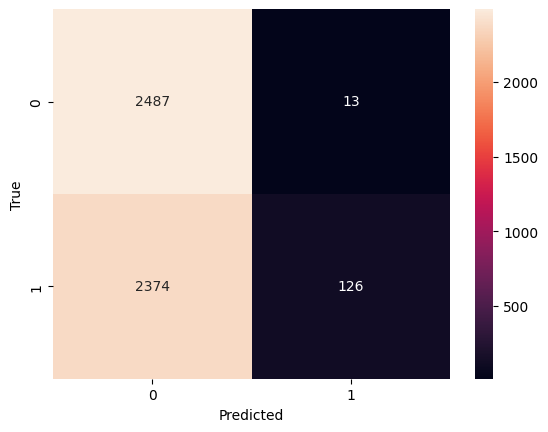

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/100
125/125 [==============================] - 5s 19ms/step - loss: 0.6888 - accuracy: 0.5589 - val_loss: 0.6942 - val_accuracy: 0.4930
Epoch 2/100
125/125 [==============================] - 2s 16ms/step - loss: 0.6182 - accuracy: 0.6642 - val_loss: 0.7477 - val_accuracy: 0.4930
Epoch 3/100
125/125 [==============================] - 2s 16ms/step - loss: 0.5402 - accuracy: 0.7269 - val_loss: 0.7243 - val_accuracy: 0.4930
Epoch 4/100
125/125 [==============================] - 2s 16ms/step - loss: 0.4692 - accuracy: 0.7782 - val_loss: 0.7168 - val_accuracy: 0.5077
Epoch 5/100
125/125 [==============================] - 2s 16ms/step - loss: 0.4031 - accuracy: 0.8151 - val_loss: 0.9898 - val_accuracy: 0.5073
Epoch 6/100
125/125 [==============================] - 2s 16ms/step - loss: 0.3439 - accuracy: 0.8460 - val_loss: 1.6080 - val_accuracy: 0.5070
Epoch 7/100
125/125 [==============================] - 2s 16ms/step - loss: 0.2881 - accuracy: 0.8748 - val_loss: 1.3347 - val_accuracy:

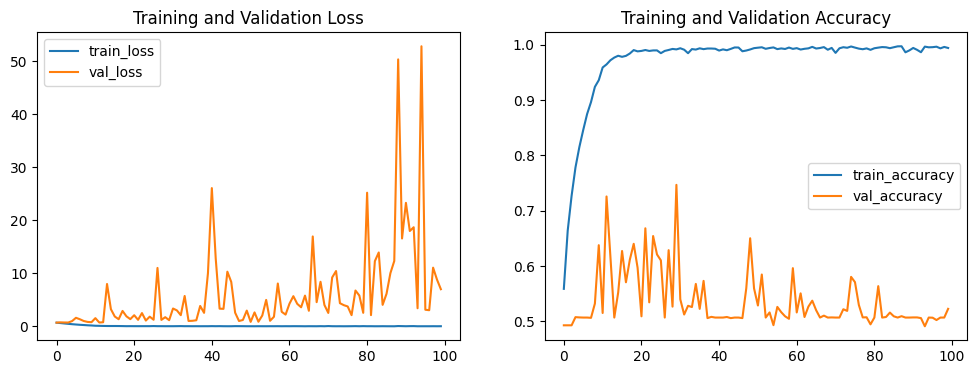

157/157 [==============================] - 0s 2ms/step


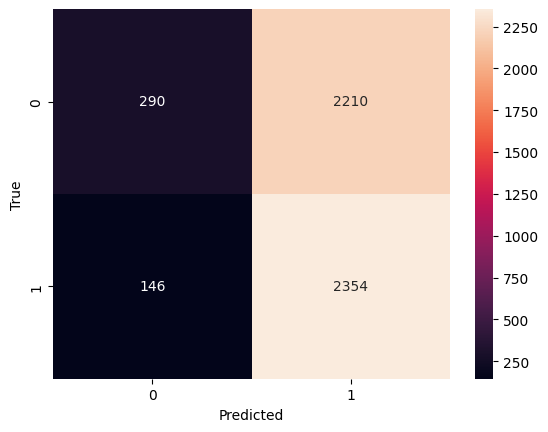

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=100, batch_size=128, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/17
125/125 [==============================] - 2s 17ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 100.2990 - val_accuracy: 0.4933
Epoch 2/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 28.3500 - val_accuracy: 0.5230
Epoch 3/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0265 - accuracy: 0.9941 - val_loss: 10.7649 - val_accuracy: 0.5060
Epoch 4/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0782 - accuracy: 0.9738 - val_loss: 26.7397 - val_accuracy: 0.5070
Epoch 5/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0358 - accuracy: 0.9901 - val_loss: 12.4511 - val_accuracy: 0.5067
Epoch 6/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0294 - accuracy: 0.9918 - val_loss: 15.5078 - val_accuracy: 0.5067
Epoch 7/17
125/125 [==============================] - 2s 16ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 1.8805 - val_accuracy:

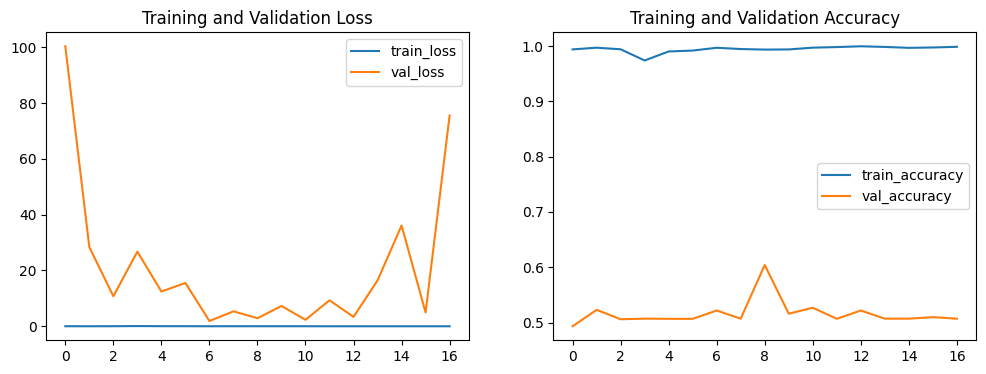

157/157 [==============================] - 0s 2ms/step


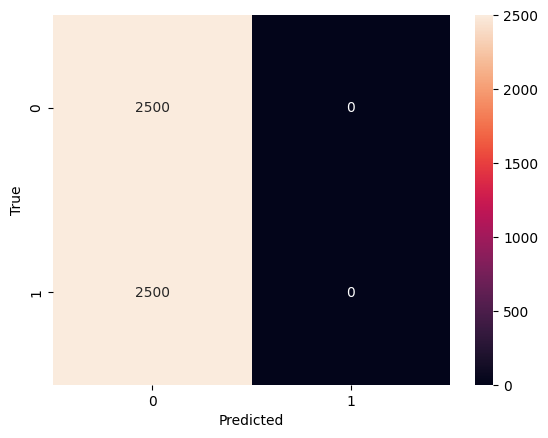

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=17, batch_size=128, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Vgg model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

# Block 1
model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 3
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(BatchNormalization())

# Block 4 - Given the input size, we might skip this for simplicity, but I'm including it for completeness.
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/50
125/125 [==============================] - 3s 21ms/step - loss: 0.2893 - accuracy: 0.8771 - val_loss: 8.3578 - val_accuracy: 0.5070
Epoch 2/50
125/125 [==============================] - 2s 19ms/step - loss: 0.2552 - accuracy: 0.8915 - val_loss: 2.3180 - val_accuracy: 0.5070
Epoch 3/50
125/125 [==============================] - 2s 19ms/step - loss: 0.2128 - accuracy: 0.9091 - val_loss: 10.2420 - val_accuracy: 0.5070
Epoch 4/50
125/125 [==============================] - 2s 19ms/step - loss: 0.1785 - accuracy: 0.9257 - val_loss: 38.6918 - val_accuracy: 0.5070
Epoch 5/50
125/125 [==============================] - 2s 19ms/step - loss: 0.1532 - accuracy: 0.9392 - val_loss: 5.1707 - val_accuracy: 0.5070
Epoch 6/50
125/125 [==============================] - 2s 19ms/step - loss: 0.1179 - accuracy: 0.9524 - val_loss: 4.5012 - val_accuracy: 0.5070
Epoch 7/50
125/125 [==============================] - 2s 19ms/step - loss: 0.1013 - accuracy: 0.9611 - val_loss: 1.3613 - val_accuracy: 0.61

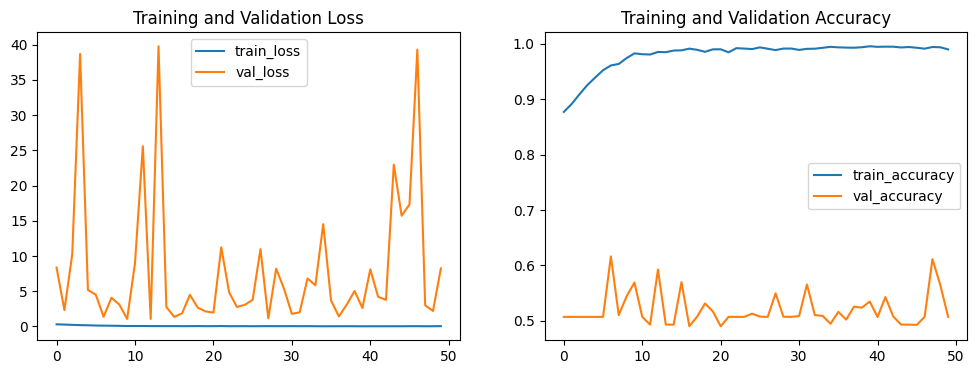

157/157 [==============================] - 0s 3ms/step


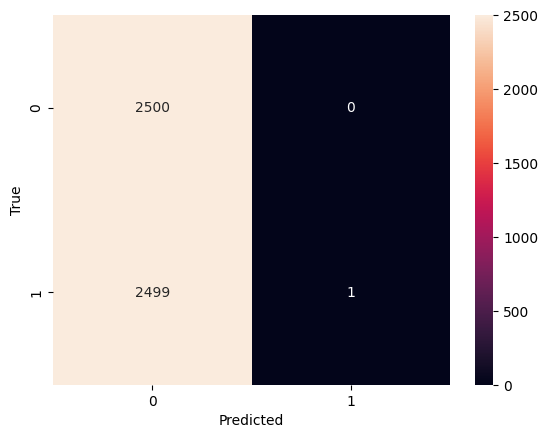

In [ ]:
# Train the model, record metrics for each iteration
history = model.fit(train_x, train_y, epochs=50, batch_size=128, validation_split=0.2)

# Plotting
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Output confusion matrix
predictions = model.predict(test_x)
predictions = np.argmax(predictions, axis=1)
test_y_labels = np.argmax(test_y, axis=1)
conf_matrix = confusion_matrix(test_y_labels, predictions)

sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()